In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data = pd.read_excel("LinkedinData_updated9-3-2020.xlsx")

In [3]:
data.head()

,id,Full name,Email,Profile url,First name,Last name,Title,Avatar,Location,Address,...,Skills,Followers,Relationship,Connected at,Industry,Mutual Count,Mutual,Mutual 1,Mutual 2,Interests
0,manozep,Manoj Paudel,NaN,https://www.linkedin.com/in/manozep/,Manoj,Paudel,Economist,https://media-exp1.licdn.com/dms/image/C5103AQ...,Nepal,NaN,...,"""Research : 21, Data Analysis : 17, Stata : 2,...",3142.0,10,NaT,Government Administration,NaN,NaN,NaN,NaN,Daniel Goleman; Richard Branson; Barclays; Glo...
1,binisha-nepal-213a58133,Binisha Nepal,NaN,https://www.linkedin.com/in/binisha-nepal-213a...,Binisha,Nepal,Economist at Institute for Integrated Developm...,https://media-exp1.licdn.com/dms/image/C4E03AQ...,Nepal,NaN,...,"""Risk Management : 5, Quantitative Research : ...",614.0,10,NaT,Education Management,NaN,NaN,NaN,NaN,Sallie Krawcheck; Steve Blank; EY; Paul Polman...
2,uttampaudel12345,Uttam Paudel,NaN,https://www.linkedin.com/in/uttampaudel12345/,Uttam,Paudel,Economist,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",Nepal,NaN,...,"""Community Development : 29, Capacity Building...",NaN,10,NaT,Non-profit Organization Management,NaN,NaN,NaN,NaN,"NDF: Tourism, Culture & Conservation; Westpac;..."
3,satyendra-timilsina-58a979119,Satyendra Timilsina,NaN,https://www.linkedin.com/in/satyendra-timilsin...,Satyendra,Timilsina,Economist at Self,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",Nepal,NaN,...,"""""",NaN,10,NaT,Banking,NaN,NaN,NaN,NaN,The Economist; The World Bank
4,raju-laudari-b56b4a11,Raju Laudari,NaN,https://www.linkedin.com/in/raju-laudari-b56b4...,Raju,Laudari,Senior Economist at AEPC,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",Nepal,NaN,...,"""""",NaN,10,NaT,Environmental Services,NaN,NaN,NaN,NaN,University of Twente


In [4]:
data.shape

(7164, 144)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7164 entries, 0 to 7163
Columns: 144 entries, id to Interests
dtypes: datetime64[ns](2), float64(40), int64(5), object(97)
memory usage: 7.9+ MB


In [6]:
dataset = data.iloc[:, [1,3,6,8,100,101,129,130,131,132,133]]

In [7]:
dataset= dataset.drop_duplicates(subset=["Profile url"], keep="last")
dataset

,Full name,Profile url,Title,Location,APPROX YEARS,PRO RATINGS,PhD points,Master points,Bachelor points,Education Ratings,Summary_Complete
0,Manoj Paudel,https://www.linkedin.com/in/manozep/,Economist,Nepal,5.024658,33.497717,0,75,50,75,Professional and academic focus on generating ...
1,Binisha Nepal,https://www.linkedin.com/in/binisha-nepal-213a...,Economist at Institute for Integrated Developm...,Nepal,7.769863,51.799087,0,75,50,75,Economist at Institute for Integrated Developm...
2,Uttam Paudel,https://www.linkedin.com/in/uttampaudel12345/,Economist,Nepal,28.115068,100.000000,100,75,0,100,I believe results producing depends on planni...
3,Satyendra Timilsina,https://www.linkedin.com/in/satyendra-timilsin...,Economist at Self,Nepal,0.000000,0.000000,0,0,0,25,Satyendra Timilsina
4,Raju Laudari,https://www.linkedin.com/in/raju-laudari-b56b4...,Senior Economist at AEPC,Nepal,0.000000,0.000000,0,75,0,75,Raju Laudari
...,...,...,...,...,...,...,...,...,...,...,...
7159,Manoj Neupane,https://www.linkedin.com/in/manoj-neupane-6868...,Forest officer at Government of Nepal (GoN),Nepal,4.854795,32.365297,0,75,50,75,NaN
7160,Saumya Shrestha,https://www.linkedin.com/in/saumya-shrestha-9a...,Senior Structural Engineer and Instructor at R...,Nepal,5.183562,34.557078,0,75,50,75,Iâ€™m a highly organized and motivated civil e...
7161,Bipin Nepal,https://www.linkedin.com/in/bipin-nepal-576a1355/,Site Supervisor at UNOPS,Nepal,13.860274,92.401826,0,0,50,50,Experienced Site Supervisor with a demonstrate...
7162,Shashindra B.,https://www.linkedin.com/in/shashindrabhandari/,"Chief Executive Officer - Aftersales, at BAW, ...",Nepal,20.013699,100.000000,0,75,50,75,"Hardworking, Loyal, Dependable, Adore Leadersh..."


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6229 entries, 0 to 7163
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Full name          6229 non-null   object 
 1   Profile url        6229 non-null   object 
 2   Title              6224 non-null   object 
 3   Location           6222 non-null   object 
 4   APPROX YEARS       5994 non-null   float64
 5   PRO RATINGS        5994 non-null   float64
 6   PhD points         6229 non-null   int64  
 7   Master points      6229 non-null   int64  
 8   Bachelor points    6229 non-null   int64  
 9   Education Ratings  6229 non-null   int64  
 10  Summary_Complete   6009 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 584.0+ KB


# Recommendation based on scaled weighted experience and qualification score(Priority is given 50% to both)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
data_scaled_df=scaling.fit_transform(dataset[['PRO RATINGS','Education Ratings']])
data_normalized_df=pd.DataFrame(dataset,columns=['PRO RATINGS','Education Ratings'])
data_normalized_df.head()

,PRO RATINGS,Education Ratings
0,33.497717,75
1,51.799087,75
2,100.000000,100
3,0.000000,25
4,0.000000,75


In [10]:
dataset[['normalized_experience_rating','normalized_qualification_rating']]= data_normalized_df

In [11]:
dataset.head()

,Full name,Profile url,Title,Location,APPROX YEARS,PRO RATINGS,PhD points,Master points,Bachelor points,Education Ratings,Summary_Complete,normalized_experience_rating,normalized_qualification_rating
0,Manoj Paudel,https://www.linkedin.com/in/manozep/,Economist,Nepal,5.024658,33.497717,0,75,50,75,Professional and academic focus on generating ...,33.497717,75
1,Binisha Nepal,https://www.linkedin.com/in/binisha-nepal-213a...,Economist at Institute for Integrated Developm...,Nepal,7.769863,51.799087,0,75,50,75,Economist at Institute for Integrated Developm...,51.799087,75
2,Uttam Paudel,https://www.linkedin.com/in/uttampaudel12345/,Economist,Nepal,28.115068,100.000000,100,75,0,100,I believe results producing depends on planni...,100.000000,100
3,Satyendra Timilsina,https://www.linkedin.com/in/satyendra-timilsin...,Economist at Self,Nepal,0.000000,0.000000,0,0,0,25,Satyendra Timilsina,0.000000,25
4,Raju Laudari,https://www.linkedin.com/in/raju-laudari-b56b4...,Senior Economist at AEPC,Nepal,0.000000,0.000000,0,75,0,75,Raju Laudari,0.000000,75


# Enter Title

In [12]:
title=input("enter title")
#title_casefold=title.casefold()
print(title)

enter titlehighway engineer
highway engineer


In [13]:
dataset=dataset[dataset['Title'].str.contains(title, na=False, flags=re.IGNORECASE, regex=True)]

In [14]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', -1) #display complete(non-truncated) content inside a cell
dataset['score'] = dataset['normalized_experience_rating'] * 0.5 + dataset['normalized_qualification_rating'] * 0.5
dataset_scored_df = dataset.sort_values(['score'], ascending=False)
dataset_scored_df[['Full name', 'Profile url', 'Title','Location','Summary_Complete','APPROX YEARS','normalized_experience_rating','normalized_qualification_rating','score']].head(50)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Full name  \
3521  Karna Kc                 
3528  Sidha Raj Pant           
3630  Rajendra Raj Sharma      
3632  Pushkar Poudel           
3626  Bishow Kc                
3586  Shyam Galan              
3516  Narayan Kc               
3573  Gobardhan Banskota       
3640  Hariom Srivastav         
3637  Hem Shrestha             
3631  Nripendra Pandey         
3542  Prakash Poudel           
3515  Sudeep Thapa             
3517  Jigesh Chaudhary         
3518  Birendra Prakash Gupta   
3549  Shorya Kaushik           
3635  Manish Shrestha          
3537  Shrikantha Lacoul        
3634  Sagar Pokharel           
3587  Pawan Bhattarai          
3563  Piyush Chataut           
3564  Santosh Thapa            
3576  Krishna Acharya          
3659  Ganesh Eshwar            
3566  Laxmi Sundar Hakuduwal   
3568  Alan Crone               
3539  Ram Silwal               
3536  Dasharath Shrestha       
3527  Mahendra Thakur          
3526  Ananda Khanal            
3525  Suman Yogesh             
3524  Ashis Thapa Magar        
3523  Manda Panta              
3522  Pratap Man Shrestha      
3519  Rohit Acharya            
3851  B M Shakya Shakya        

                                                        Profile url  \
3521  https://www.linkedin.com/in/karna-kc-b3022b78/                  
3528  https://www.linkedin.com/in/sidha-raj-pant-1045a16a/            
3630  https://www.linkedin.com/in/rajendra-raj-sharma-0905051b/       
3632  https://www.linkedin.com/in/pushkar-poudel-9670b6180/           
3626  https://www.linkedin.com/in/bishow-kc-71603aa6/                 
3586  https://www.linkedin.com/in/shyam-galan-a136ba27/               
3516  https://www.linkedin.com/in/narayan-kc-757aba138/               
3573  https://www.linkedin.com/in/gobardhan-banskota-4a04568a/        
3640  https://www.linkedin.com/in/hariom-srivastav-9203211b/          
3637  https://www.linkedin.com/in/hem-shrestha-032229b/               
3631  https://www.linkedin.com/in/nripendra-pandey-1a076125/          
3542  https://www.linkedin.com/in/prakash-poudel-796b1b15/            
3515  https://www.linkedin.com/in/108sudip/                           
3517  https://www.linkedin.com/in/jigesh-chaudhary-38022887/          
3518  https://www.linkedin.com/in/birendra-prakash-gupta-125a6270/    
3549  https://www.linkedin.com/in/shorya-kaushik-8b262a67/            
3635  https://www.linkedin.com/in/manish-shrestha-91052347/           
3537  https://www.linkedin.com/in/shrikantha-lacoul-b1433b39/         
3634  https://www.linkedin.com/in/sagar-pokharel-66927710a/           
3587  https://www.linkedin.com/in/pawan-bhattarai-a4890550/           
3563  https://www.linkedin.com/in/piyush-chataut-72813288/            
3564  https://www.linkedin.com/in/santosh-thapa-b37853109/            
3576  https://www.linkedin.com/in/krishna-acharya-6021a1ba/           
3659  https://www.linkedin.com/in/ganesh-eshwar-7857aa1aa/            
3566  https://www.linkedin.com/in/laxmi-sundar-hakuduwal-863975193/   
3568  https://www.linkedin.com/in/alan-crone-4b6270143/               
3539  https://www.linkedin.com/in/ram-silwal-5478675b/                
3536  https://www.linkedin.com/in/dasharath-shrestha-8482a650/        
3527  https://www.linkedin.com/in/mahendra-thakur-b77ab370/           
3526  https://www.linkedin.com/in/ananda-khanal-bab355a0/             
3525  https://www.linkedin.com/in/suman-yogesh-28374b130/             
3524  https://www.linkedin.com/in/ashis-thapa-magar-3696b136/         
3523  https://www.linkedin.com/in/manda-panta-400585179/              
3522  https://www.linkedin.com/in/pratap-man-shrestha-901b21136/      
3519  https://www.linkedin.com/in/rohit-acharya-70906135/             
3851  https://www.linkedin.com/in/b-m-shakya-shakya-bb852b27/         

                                                                                                                       Title  \
3521  Highway Engineer  at The Project for the Operation and Maintenance of Si

Text(0, 0.5, 'Potential Candidate')

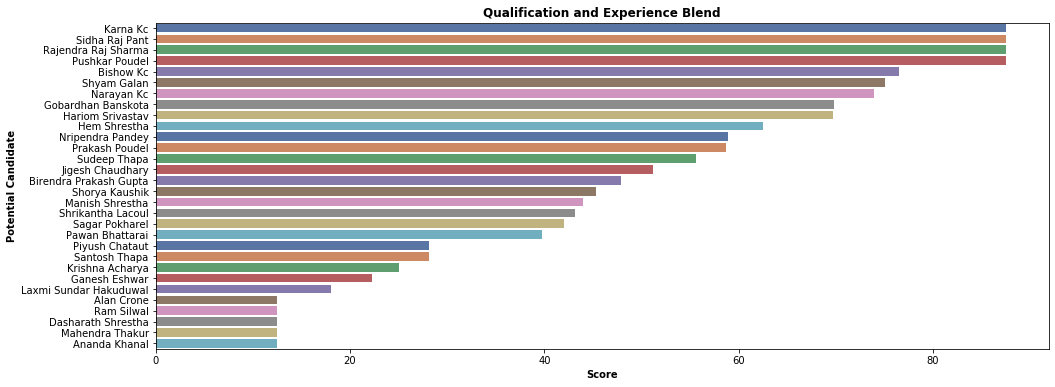

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

scored_df = dataset.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(30), y=scored_df['Full name'].head(30), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Qualification and Experience Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Potential Candidate', weight='bold')

# To select only the candidates with Bachelor Degree

In [16]:
#is_long=dataset.normalized_qualification_rating==50
#is_long.head(20)

In [17]:
data_bachelors=dataset[dataset.normalized_qualification_rating==50]

In [18]:
dataset_bachelors_scored_df = data_bachelors.sort_values(['score'], ascending=False)
dataset_bachelors_scored_df[['Full name', 'Profile url', 'Title','Location','Summary_Complete','APPROX YEARS','normalized_experience_rating','normalized_qualification_rating','score']].head(20)

Full name  \
3586  Shyam Galan              
3516  Narayan Kc               
3542  Prakash Poudel           
3518  Birendra Prakash Gupta   
3549  Shorya Kaushik           
3635  Manish Shrestha          
3634  Sagar Pokharel           
3576  Krishna Acharya          

                                                       Profile url  \
3586  https://www.linkedin.com/in/shyam-galan-a136ba27/              
3516  https://www.linkedin.com/in/narayan-kc-757aba138/              
3542  https://www.linkedin.com/in/prakash-poudel-796b1b15/           
3518  https://www.linkedin.com/in/birendra-prakash-gupta-125a6270/   
3549  https://www.linkedin.com/in/shorya-kaushik-8b262a67/           
3635  https://www.linkedin.com/in/manish-shrestha-91052347/          
3634  https://www.linkedin.com/in/sagar-pokharel-66927710a/          
3576  https://www.linkedin.com/in/krishna-acharya-6021a1ba/          

                                                                                                                       Title  \
3586  Road Cum,Highway Engineer/Construction Manager                                                                           
3516  Freelancer Highway Engineer                                                                                              
3542  Highway Engineer at Department of Roads, Nepal                                                                           
3518  Highway Engineer at Postal Highway Project Office Kapilvastu, DOR, GoN                                                   
3549  Highway Engineer at DRAIPL                                                                                               
3635  Highway Engineer at Cemat Consultants (P) Ltd. â€“ Silt Consultants (P) Ltd. â€“ Building Design Authority (P) Ltd. JV   
3634  Highway Engineer at Department of roads,Nepal                                                                            
3576  Highway Engineer at Department of Road                                                                                   

     Location  \
3586  Nepal     
3516  Nepal     
3542  Nepal     
3518  Nepal     
3549  Nepal     
3635  Nepal     
3634  Nepal     
3576  Nepal     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Text(0, 0.5, 'Potential Candidate')

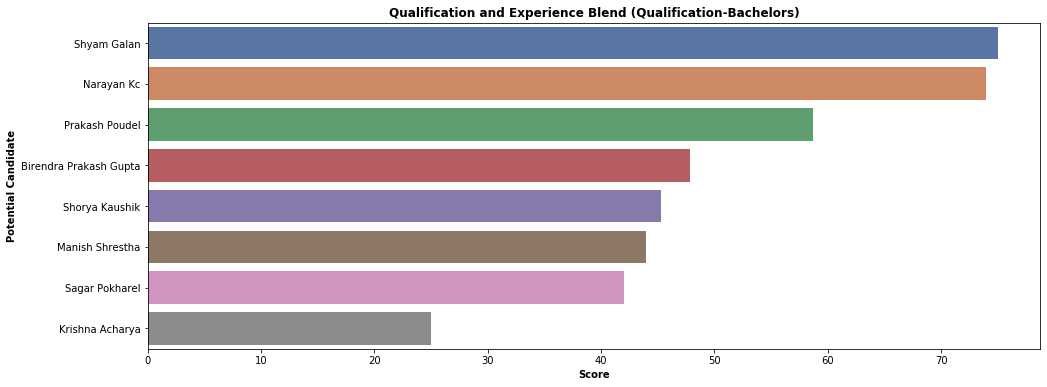

In [19]:
scored_df = data_bachelors.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(40), y=scored_df['Full name'].head(40), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Qualification and Experience Blend (Qualification-Bachelors)', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Potential Candidate', weight='bold')

# Search by Keywords 

In [20]:
#keyword=input("enter keyword")
#keyword_casefold=keyword.casefold()

In [ ]:
n=input("number of keywords")
n=int(n)
keywords=[]
print ("Enter the keywords")
for i in range(n):
    x=input()
    keywords.append(x) 
    
print(keywords)

number of keywords1
Enter the keywords


In [ ]:
dataset_withoutNAN = dataset.dropna(axis=0, subset=['Summary_Complete'])
dataset_withoutNAN["Summary_Complete"]=dataset_withoutNAN["Summary_Complete"].str.casefold()
#dataset_withoutNAN

# For Logical OR 

In [ ]:
#OR
#print(keyword_casefold)
data_searchkeyword=dataset_withoutNAN[dataset_withoutNAN['Summary_Complete'].str.contains('|'.join(keywords))]

# For Logical AND

In [ ]:
#AND
import regex
base = r'^{}'
expr = '(?=.*{})'
base.format(''.join(expr.format(k) for k in keywords))
data_searchkeyword=dataset_withoutNAN[dataset_withoutNAN['Summary_Complete'].str.contains(base.format(''.join(expr.format(k) for k in keywords)))]


In [ ]:
#AND
#print(keyword_casefold)
#data_searchkeyword=dataset_withoutNAN[(dataset_withoutNAN['Summary'].str.contains('graduated')) & (dataset_withoutNAN['Summary'].str.contains('civil'))]


In [ ]:
data_searchkeyword_scored_df = data_searchkeyword.sort_values(['score'], ascending=False)
data_searchkeyword_scored_df[['Full name', 'Profile url', 'Title','Location','Summary_Complete','APPROX YEARS','normalized_experience_rating','normalized_qualification_rating','score']].head(20)

In [ ]:
scored_df = data_searchkeyword.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(20), y=scored_df['Full name'].head(20), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Qualification and Experience Blend (Keyword Search Results)', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Potential Candidate', weight='bold')